# Front Blocker - No Rear Blocker - 10-Shell optics to compare with Ron's results

## Feb, 2018
## @Milo

### My Goal is to reproduce this plot:

<img src="../Slides/ron_sim.png",width=900,height=600>

# Front = 2.86cm , No rear

In [38]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 2.8575
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F286_NR_All_Drays, F286_NR_All_Hrays, F286_NR_All_Prays = [], [], []
F286_NR_All_Dx, F286_NR_All_Dy, F286_NR_All_Hx, F286_NR_All_Hy, F286_NR_All_Px, F286_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F286_NR_All_Drays.append(Drays)
    F286_NR_All_Hrays.append(Hrays)
    F286_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F286_NR_All_Hx.append(Hx)
    F286_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F286_NR_All_Px.append(Px)
    F286_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F286_NR_All_Dx.append(Dx)
    F286_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

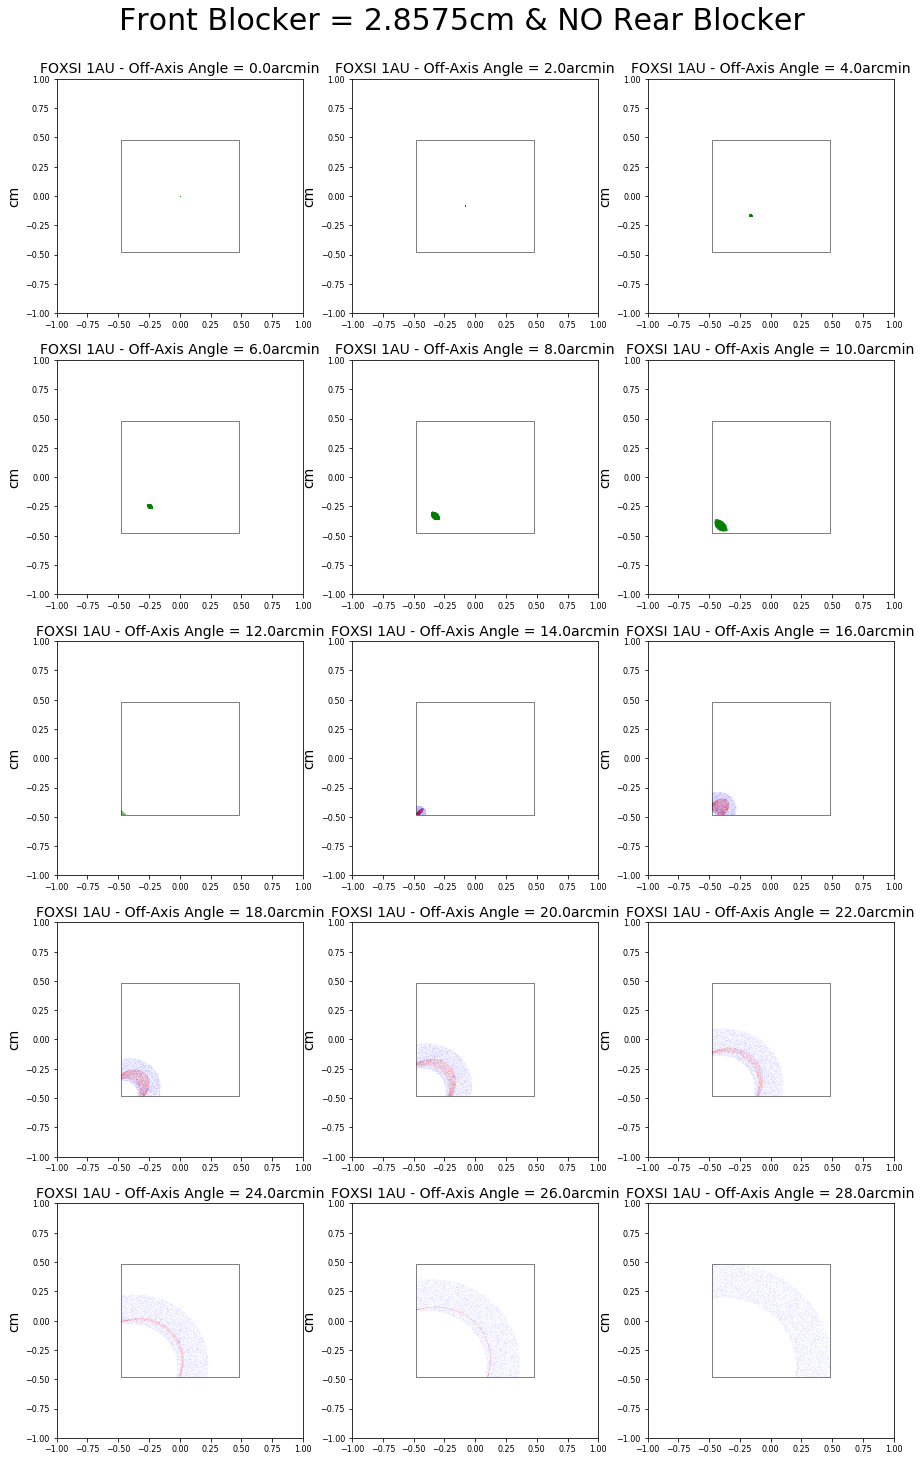

In [39]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 2.8575cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F286_NR_All_Hx[i],F286_NR_All_Hy[i],color='red',s=0.0001,alpha=0.8)
    plt.scatter(F286_NR_All_Px[i],F286_NR_All_Py[i],color='blue',s=0.0001,alpha=0.8)
    plt.scatter(F286_NR_All_Dx[i],F286_NR_All_Dy[i],color='green',s=0.0001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.48),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [40]:
Rout = 3.29
fbr = 2.8575
F286_NR_Doubles, F286_NR_Hyp, F286_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F286_NR_Doubles.append(len(F286_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F286_NR_Hyp.append(len(F286_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F286_NR_Par.append(len(F286_NR_All_Prays[i]) * (Rout**2 - fbr**2))

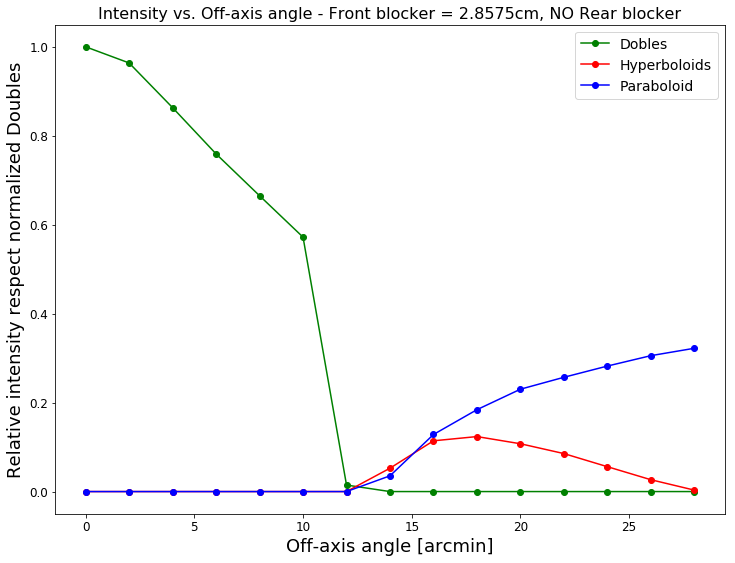

In [41]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 2.8575cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F286_NR_Doubles/max(np.array(F286_NR_Doubles)),'go-',label='Dobles')
#plt.plot(offaxisAngles[:7], Ron_Doubles/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.plot(offaxisAngles, F286_NR_Hyp/max(np.array(F286_NR_Doubles)),'ro-',label='Hyperboloids')
plt.plot(offaxisAngles, F286_NR_Par/max(np.array(F286_NR_Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

# Front = 3.09cm , No rear

In [42]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.09671
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_NR_All_Drays, F309_NR_All_Hrays, F309_NR_All_Prays = [], [], []
F309_NR_All_Dx, F309_NR_All_Dy, F309_NR_All_Hx, F309_NR_All_Hy, F309_NR_All_Px, F309_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_NR_All_Drays.append(Drays)
    F309_NR_All_Hrays.append(Hrays)
    F309_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_NR_All_Hx.append(Hx)
    F309_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_NR_All_Px.append(Px)
    F309_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_NR_All_Dx.append(Dx)
    F309_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

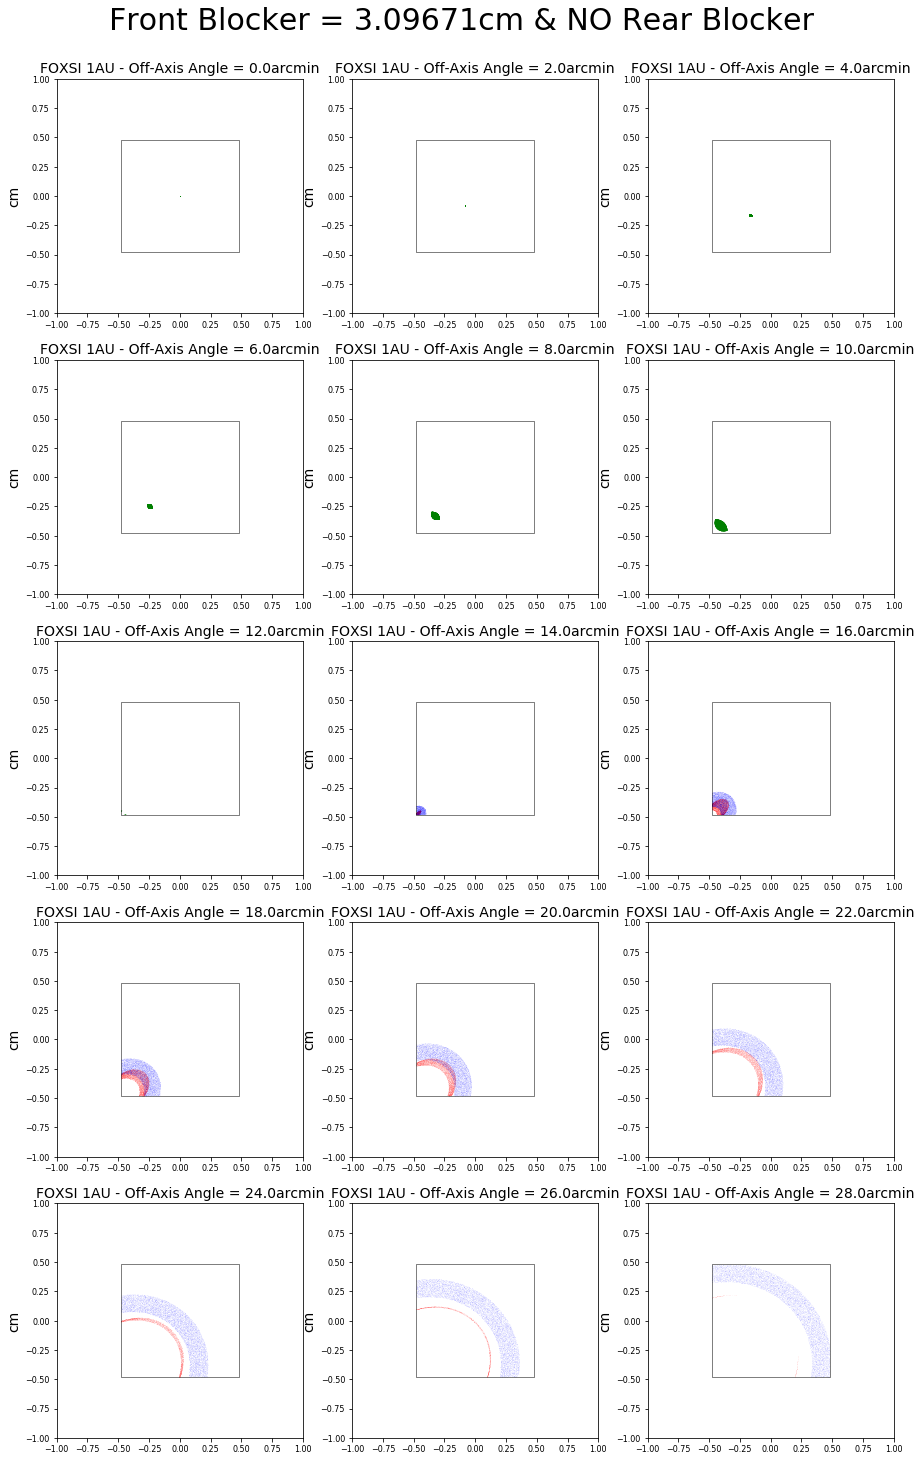

In [43]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.09671cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F309_NR_All_Hx[i],F309_NR_All_Hy[i],color='red',s=0.0001,alpha=0.8)
    plt.scatter(F309_NR_All_Px[i],F309_NR_All_Py[i],color='blue',s=0.0001,alpha=0.8)
    plt.scatter(F309_NR_All_Dx[i],F309_NR_All_Dy[i],color='green',s=0.0001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.5),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [44]:
Rout = 3.29
fbr = 3.09671
F309_NR_Doubles, F309_NR_Hyp, F309_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_NR_Doubles.append(len(F309_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_NR_Hyp.append(len(F309_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_NR_Par.append(len(F309_NR_All_Prays[i]) * (Rout**2 - fbr**2))

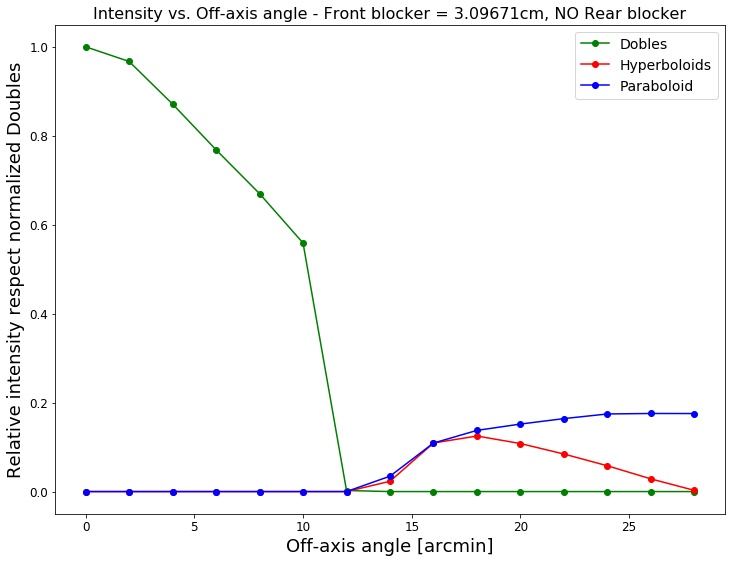

In [45]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.09671cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F309_NR_Doubles/max(np.array(F309_NR_Doubles)),'go-',label='Dobles')
#plt.plot(offaxisAngles[:7], Ron_Doubles/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.plot(offaxisAngles, F309_NR_Hyp/max(np.array(F309_NR_Doubles)),'ro-',label='Hyperboloids')
plt.plot(offaxisAngles, F309_NR_Par/max(np.array(F309_NR_Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

# Front = 3.1334cm , No rear

In [48]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.1334
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F313_NR_All_Drays, F313_NR_All_Hrays, F313_NR_All_Prays = [], [], []
F313_NR_All_Dx, F313_NR_All_Dy, F313_NR_All_Hx, F313_NR_All_Hy, F313_NR_All_Px, F313_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F313_NR_All_Drays.append(Drays)
    F313_NR_All_Hrays.append(Hrays)
    F313_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F313_NR_All_Hx.append(Hx)
    F313_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F313_NR_All_Px.append(Px)
    F313_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F313_NR_All_Dx.append(Dx)
    F313_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

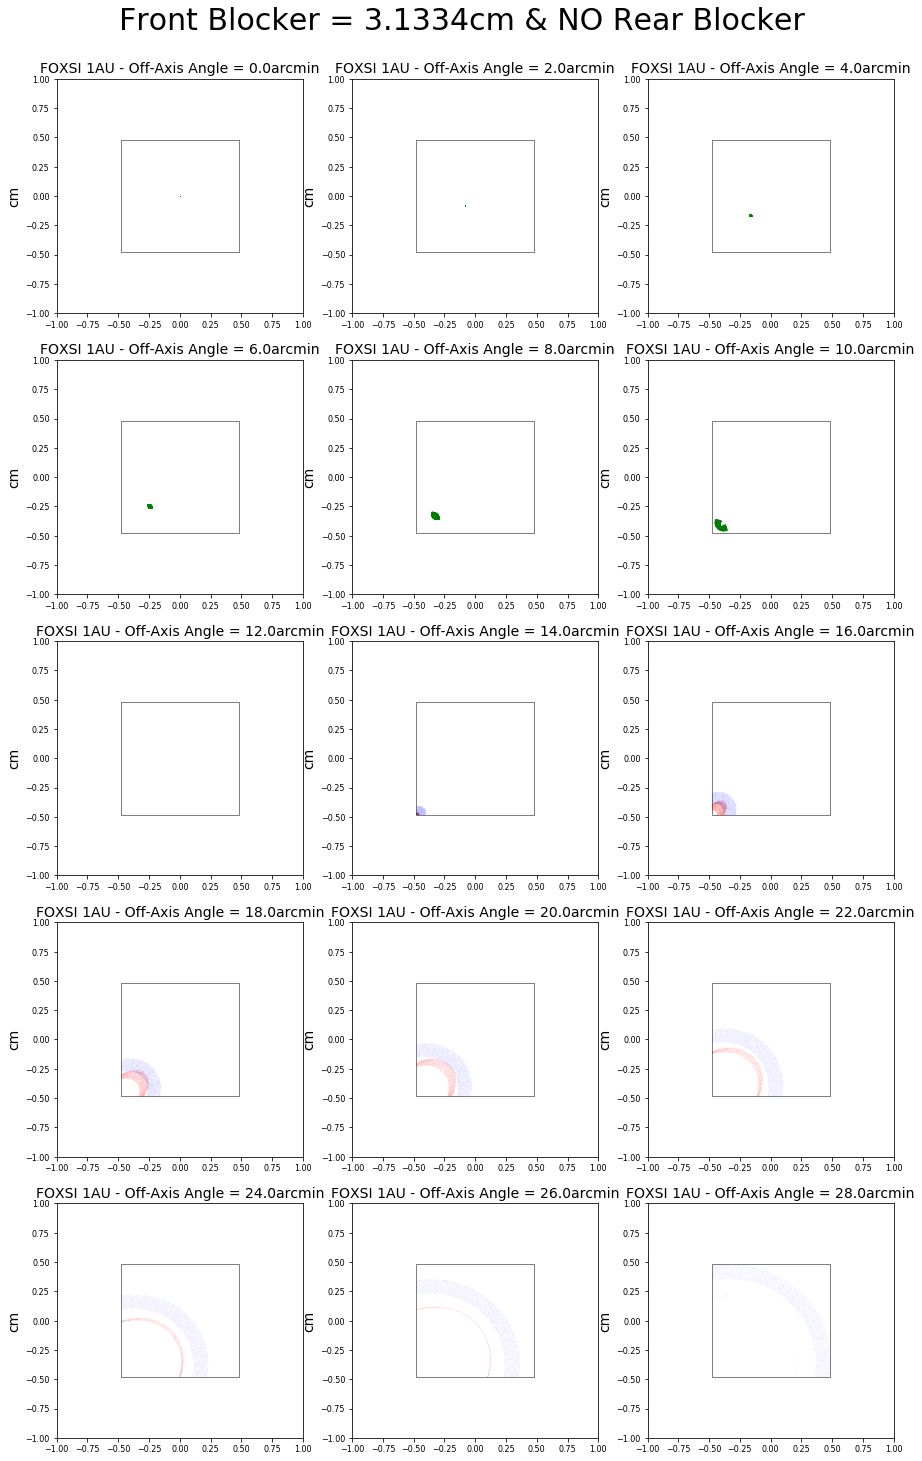

In [49]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.1334cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F313_NR_All_Hx[i],F313_NR_All_Hy[i],color='red',s=0.00001,alpha=0.8)
    plt.scatter(F313_NR_All_Px[i],F313_NR_All_Py[i],color='blue',s=0.00001,alpha=0.8)
    plt.scatter(F313_NR_All_Dx[i],F313_NR_All_Dy[i],color='green',s=0.00001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.5),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [50]:
Rout = 3.29
fbr = 3.1334
F313_NR_Doubles, F313_NR_Hyp, F313_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F313_NR_Doubles.append(len(F313_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F313_NR_Hyp.append(len(F313_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F313_NR_Par.append(len(F313_NR_All_Prays[i]) * (Rout**2 - fbr**2))

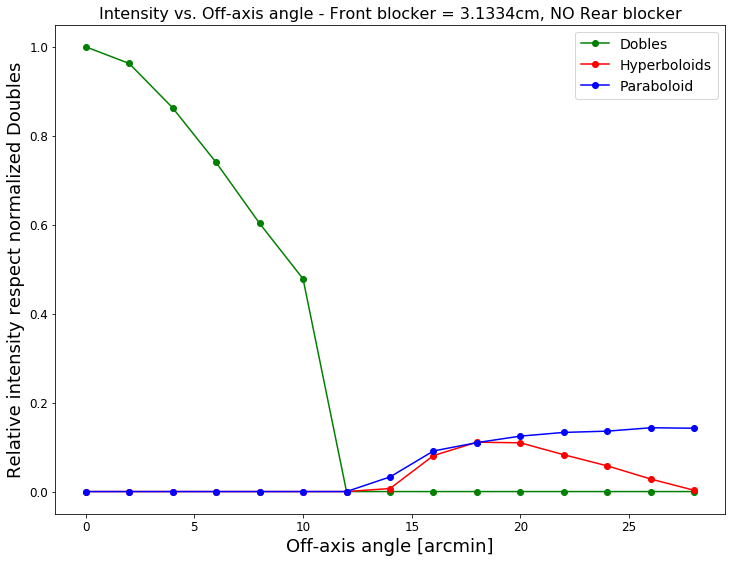

In [51]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.1334cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F313_NR_Doubles/max(np.array(F313_NR_Doubles)),'go-',label='Dobles')
#plt.plot(offaxisAngles[:7], Ron_Doubles/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.plot(offaxisAngles, F313_NR_Hyp/max(np.array(F313_NR_Doubles)),'ro-',label='Hyperboloids')
plt.plot(offaxisAngles, F313_NR_Par/max(np.array(F313_NR_Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

# Front = 3.17cm , No rear

In [147]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.17
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F317_NR_All_Drays, F317_NR_All_Hrays, F317_NR_All_Prays = [], [], []
F317_NR_All_Dx, F317_NR_All_Dy, F317_NR_All_Hx, F317_NR_All_Hy, F317_NR_All_Px, F317_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F317_NR_All_Drays.append(Drays)
    F317_NR_All_Hrays.append(Hrays)
    F317_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F317_NR_All_Hx.append(Hx)
    F317_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F317_NR_All_Px.append(Px)
    F317_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F317_NR_All_Dx.append(Dx)
    F317_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

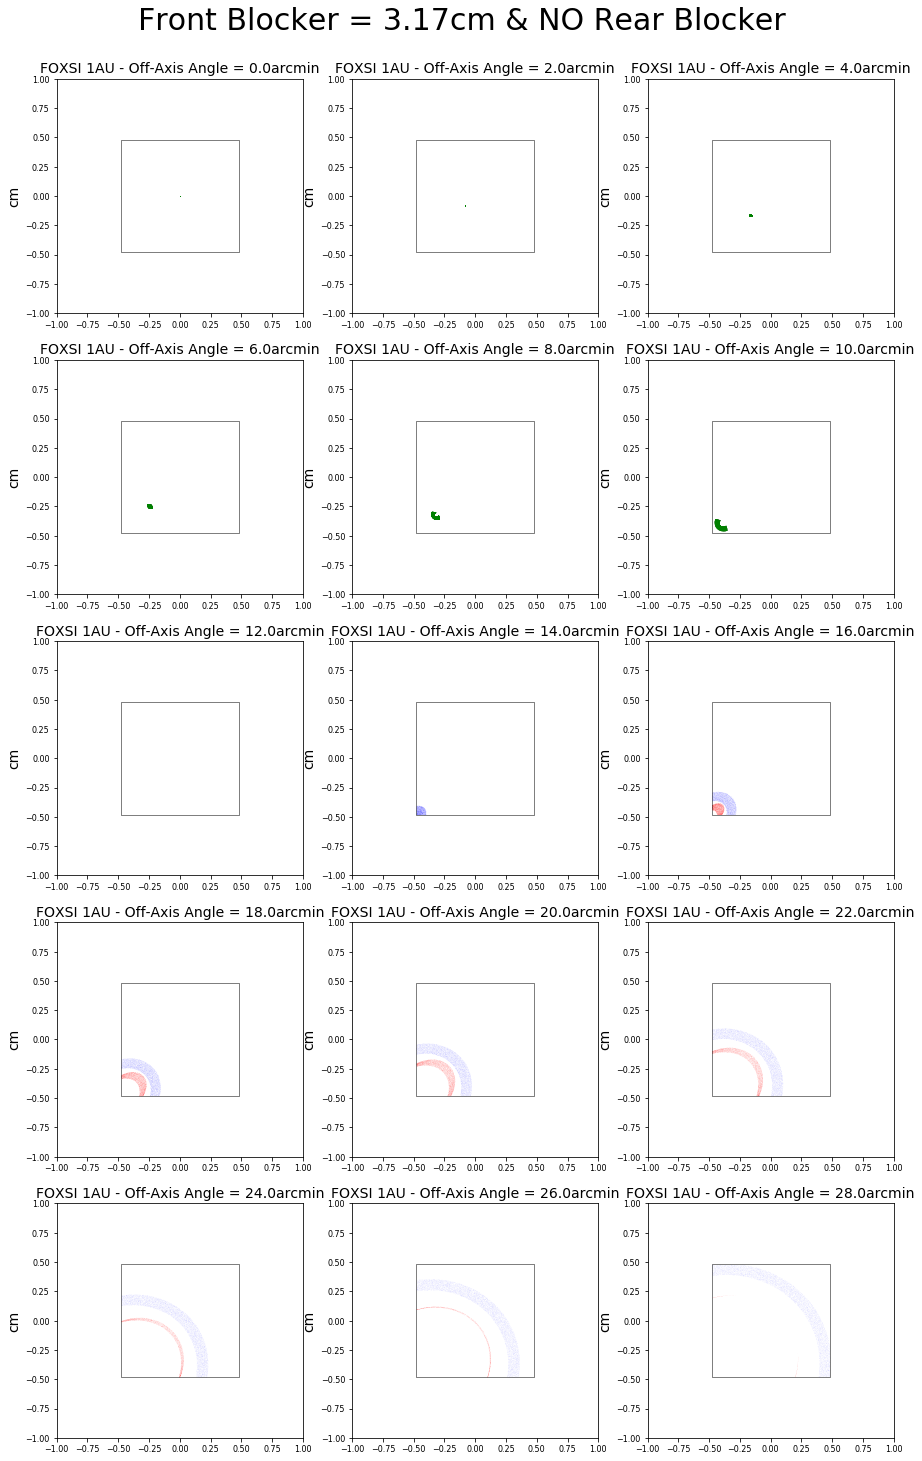

In [148]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.17cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F317_NR_All_Hx[i],F317_NR_All_Hy[i],color='red',s=0.00001,alpha=0.8)
    plt.scatter(F317_NR_All_Px[i],F317_NR_All_Py[i],color='blue',s=0.00001,alpha=0.8)
    plt.scatter(F317_NR_All_Dx[i],F317_NR_All_Dy[i],color='green',s=0.00001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.5),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [149]:
Rout = 3.29
fbr = 3.17
F317_NR_Doubles, F317_NR_Hyp, F317_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F317_NR_Doubles.append(len(F317_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F317_NR_Hyp.append(len(F317_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F317_NR_Par.append(len(F317_NR_All_Prays[i]) * (Rout**2 - fbr**2))

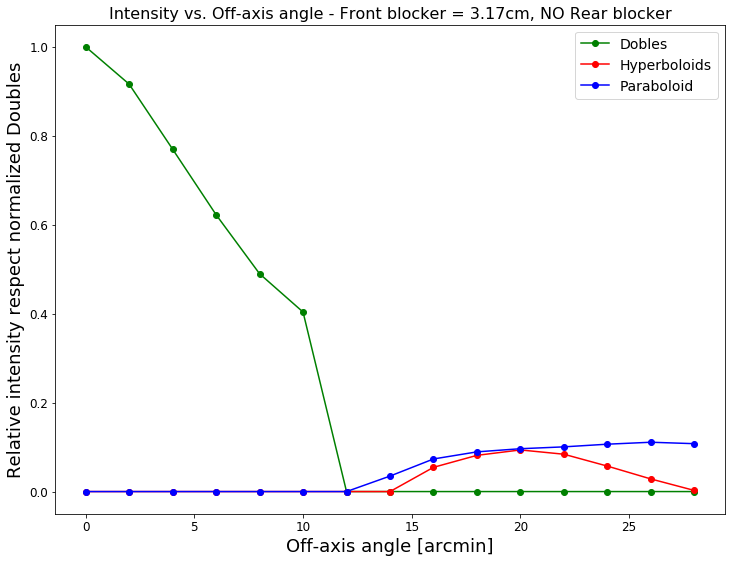

In [150]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F317_NR_Doubles/max(np.array(F317_NR_Doubles)),'go-',label='Dobles')
#plt.plot(offaxisAngles[:7], Ron_Doubles/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.plot(offaxisAngles, F317_NR_Hyp/max(np.array(F317_NR_Doubles)),'ro-',label='Hyperboloids')
plt.plot(offaxisAngles, F317_NR_Par/max(np.array(F317_NR_Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

# Ron's Data

In [109]:
RonD_F317_NR = [2.407, 2.203, 1.854, 1.511, 1.188, 0.974, 0., 0., 0., 0., 0., 0., 0., 0., 0.]
RonD_F313_NR = [2.407, 2.325, 2.088, 1.772, 1.451, 1.148, 0., 0., 0., 0., 0., 0., 0., 0., 0.]
RonD_F309_NR = [2.405, 2.319, 2.092, 1.842, 1.613, 1.342, 0.004, 0., 0., 0., 0., 0., 0., 0., 0.]
RonD_F286_NR = [2.41, 2.317, 2.076, 1.846, 1.634, 1.338, 0.034, 0., 0., 0., 0., 0., 0., 0., 0.]

RonP_F317_NR = [0., 0., 0., 0., 0., 0., 0., 0.085, 0.178, 0.211, 0.229, 0.243, 0.256, 0.261, 0.256 ]
RonP_F313_NR = [0., 0., 0., 0., 0., 0., 0., 0.09, 0.226, 0.276, 0.303, 0.319, 0.331, 0.346, 0.336 ]
RonP_F309_NR = [0., 0., 0., 0., 0., 0., 0., 0.085, 0.255, 0.326, 0.368, 0.395, 0.403, 0.425, 0.416 ]
RonP_F286_NR = [0., 0., 0., 0., 0., 0., 0., 0.084, 0.303, 0.449, 0.544, 0.605, 0.666, 0.75, 0.76 ]


RonH_F317_NR = [0., 0., 0., 0., 0., 0., 0., 0., 0.132, 0.193, 0.217, 0.204, 0.135, 0.066, 0.007 ]
RonH_F313_NR = [0., 0., 0., 0., 0., 0., 0., 0.017, 0.192, 0.268, 0.258, 0.205, 0.138, 0.066, 0.005 ]
RonH_F309_NR = [0., 0., 0., 0., 0., 0., 0., 0.057, 0.255, 0.302, 0.26, 0.201, 0.133, 0.069, 0.006 ]
RonH_F286_NR = [0., 0., 0., 0., 0., 0., 0., 0.139, 0.273, 0.313, 0.261, 0.201, 0.142, 0.072, 0.006 ]


In [102]:
60*180*np.arcsin(np.sqrt(0.48)/200)/np.pi

11.908727958647606

In [103]:
60*180*np.arcsin(0.48/200)/np.pi

8.2506001704729446

# All Together:

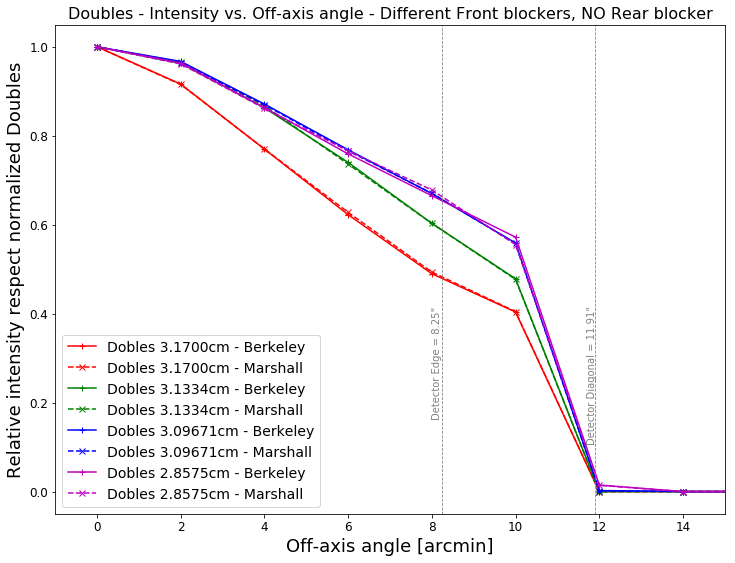

In [117]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Doubles - Intensity vs. Off-axis angle - Different Front blockers, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F317_NR_Doubles/max(np.array(F317_NR_Doubles)),'r+-',label='Dobles 3.1700cm - Berkeley')
plt.plot(offaxisAngles, RonD_F317_NR/max(np.array(RonD_F317_NR)),'rx--',label='Dobles 3.1700cm - Marshall')
plt.plot(offaxisAngles, F313_NR_Doubles/max(np.array(F313_NR_Doubles)),'g+-',label='Dobles 3.1334cm - Berkeley')
plt.plot(offaxisAngles, RonD_F313_NR/max(np.array(RonD_F313_NR)),'gx--',label='Dobles 3.1334cm - Marshall')
plt.plot(offaxisAngles, F309_NR_Doubles/max(np.array(F309_NR_Doubles)),'b+-',label='Dobles 3.09671cm - Berkeley')
plt.plot(offaxisAngles, RonD_F309_NR/max(np.array(RonD_F309_NR)),'bx--',label='Dobles 3.09671cm - Marshall')
plt.plot(offaxisAngles, F286_NR_Doubles/max(np.array(F286_NR_Doubles)),'m+-',label='Dobles 2.8575cm - Berkeley')
plt.plot(offaxisAngles, RonD_F286_NR/max(np.array(RonD_F286_NR)),'mx--',label='Dobles 2.8575cm - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.xlim((-1,15))
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(8.0,0.4,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.7,0.4,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

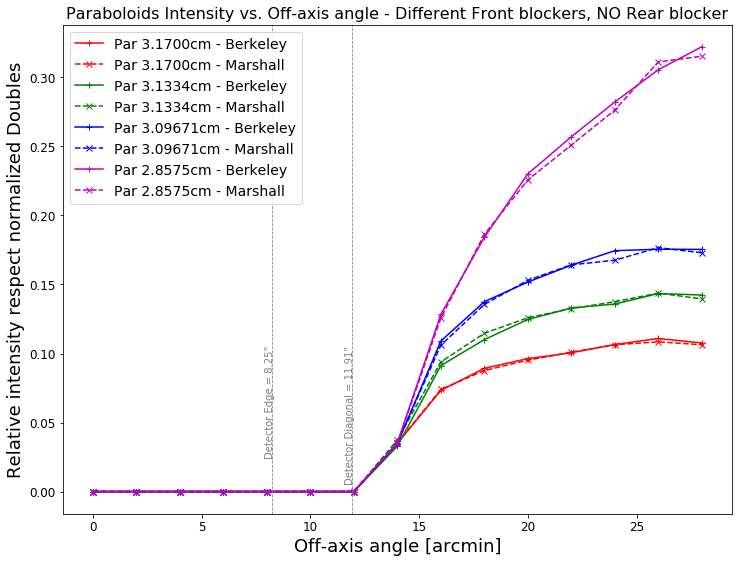

In [120]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Paraboloids Intensity vs. Off-axis angle - Different Front blockers, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F317_NR_Par/max(np.array(F317_NR_Doubles)),'r+-',label='Par 3.1700cm - Berkeley')
plt.plot(offaxisAngles, RonP_F317_NR/max(np.array(RonD_F317_NR)),'rx--',label='Par 3.1700cm - Marshall')
plt.plot(offaxisAngles, F313_NR_Par/max(np.array(F313_NR_Doubles)),'g+-',label='Par 3.1334cm - Berkeley')
plt.plot(offaxisAngles, RonP_F313_NR/max(np.array(RonD_F313_NR)),'gx--',label='Par 3.1334cm - Marshall')
plt.plot(offaxisAngles, F309_NR_Par/max(np.array(F309_NR_Doubles)),'b+-',label='Par 3.09671cm - Berkeley')
plt.plot(offaxisAngles, RonP_F309_NR/max(np.array(RonD_F309_NR)),'bx--',label='Par 3.09671cm - Marshall')
plt.plot(offaxisAngles, F286_NR_Par/max(np.array(F286_NR_Doubles)),'m+-',label='Par 2.8575cm - Berkeley')
plt.plot(offaxisAngles, RonP_F286_NR/max(np.array(RonD_F286_NR)),'mx--',label='Par 2.8575cm - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.1,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.1,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

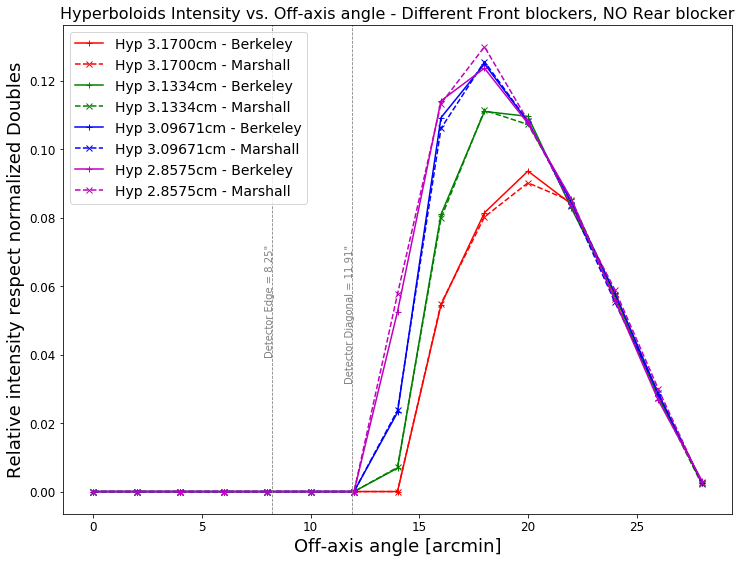

In [123]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Hyperboloids Intensity vs. Off-axis angle - Different Front blockers, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F317_NR_Hyp/max(np.array(F317_NR_Doubles)),'r+-',label='Hyp 3.1700cm - Berkeley')
plt.plot(offaxisAngles, RonH_F317_NR/max(np.array(RonD_F317_NR)),'rx--',label='Hyp 3.1700cm - Marshall')
plt.plot(offaxisAngles, F313_NR_Hyp/max(np.array(F313_NR_Doubles)),'g+-',label='Hyp 3.1334cm - Berkeley')
plt.plot(offaxisAngles, RonH_F313_NR/max(np.array(RonD_F313_NR)),'gx--',label='Hyp 3.1334cm - Marshall')
plt.plot(offaxisAngles, F309_NR_Hyp/max(np.array(F309_NR_Doubles)),'b+-',label='Hyp 3.09671cm - Berkeley')
plt.plot(offaxisAngles, RonH_F309_NR/max(np.array(RonD_F309_NR)),'bx--',label='Hyp 3.09671cm - Marshall')
plt.plot(offaxisAngles, F286_NR_Hyp/max(np.array(F286_NR_Doubles)),'m+-',label='Hyp 2.8575cm - Berkeley')
plt.plot(offaxisAngles, RonH_F286_NR/max(np.array(RonD_F286_NR)),'mx--',label='Hyp 2.8575cm - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.07,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.07,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

### Original NASA Marshall Plot:

<img src="../Slides/ron_sim.png",width=900,height=600>

# With this, we pretty much validate the use of our simulation for this particular set of analysis.

# What happen when we intruduce a 2.68cm Rear Blocker to these same simulations?

## See Notebook: "10ShellRearBlockerOffAxis.ipynb"

# Add automating testing -> Create a new notebook Called test and run this for any change we introduce to the code.

## FB = 2.8575cm - RB = 2.68cm

In [168]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 2.8575
rbr = 2.68
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F286_R268_All_Drays, F286_R268_All_Hrays, F286_R268_All_Prays = [], [], []
F286_R268_All_Dx, F286_R268_All_Dy, F286_R268_All_Hx, F286_R268_All_Hy, F286_R268_All_Px, F286_R268_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R268/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F286_R268_All_Drays.append(Drays)
    F286_R268_All_Hrays.append(Hrays)
    F286_R268_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F286_R268_All_Hx.append(Hx)
    F286_R268_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F286_R268_All_Px.append(Px)
    F286_R268_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F286_R268_All_Dx.append(Dx)
    F286_R268_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R268/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R268/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R268/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R268/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R268/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R268/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R268/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R268/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

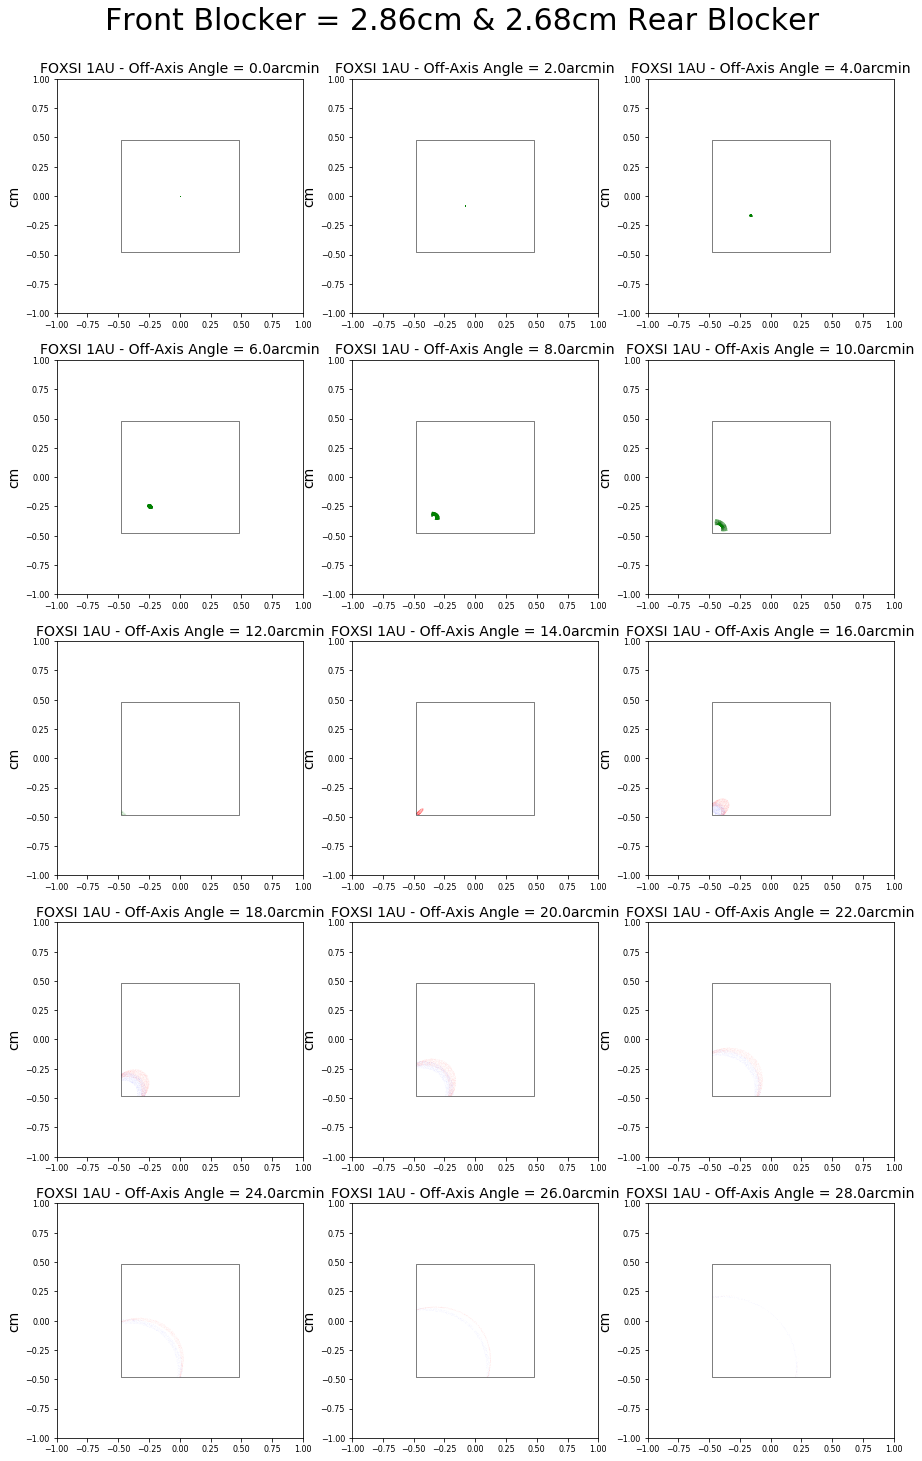

In [169]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 2.86cm & 2.68cm Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F286_R268_All_Hx[i],F286_R268_All_Hy[i],color='red',s=0.00001,alpha=0.8)
    plt.scatter(F286_R268_All_Px[i],F286_R268_All_Py[i],color='blue',s=0.00001,alpha=0.8)
    plt.scatter(F286_R268_All_Dx[i],F286_R268_All_Dy[i],color='green',s=0.00001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
plt.show()

In [170]:
Rout = 3.29
fbr = 3.17
F286_R268_Doubles, F286_R268_Hyp, F286_R268_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F286_R268_Doubles.append(len(F286_R268_All_Drays[i]) * (Rout**2 - fbr**2))
    F286_R268_Hyp.append(len(F286_R268_All_Hrays[i]) * (Rout**2 - fbr**2))
    F286_R268_Par.append(len(F286_R268_All_Prays[i]) * (Rout**2 - fbr**2))

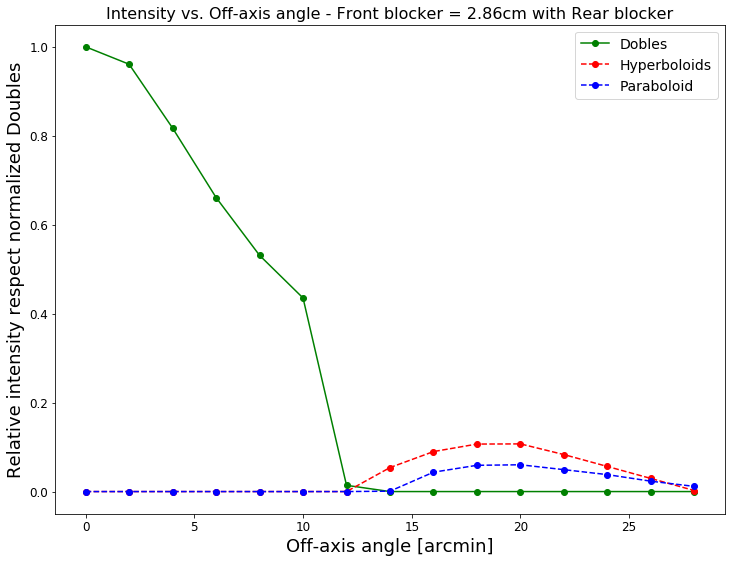

In [171]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 2.86cm with Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F286_R268_Doubles/max(np.array(F286_R268_Doubles)),'go-',label='Dobles')
plt.plot(offaxisAngles, F286_R268_Hyp/max(np.array(F286_R268_Doubles)),'ro--',label='Hyperboloids')
plt.plot(offaxisAngles, F286_R268_Par/max(np.array(F286_R268_Doubles)),'bo--',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.legend(fontsize=14)
plt.show()

## FB = 3.09671cm - RB = 2.68cm

In [161]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.09671
rbr = 2.68
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_R268_All_Drays, F309_R268_All_Hrays, F309_R268_All_Prays = [], [], []
F309_R268_All_Dx, F309_R268_All_Dy, F309_R268_All_Hx, F309_R268_All_Hy, F309_R268_All_Px, F309_R268_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_R268_All_Drays.append(Drays)
    F309_R268_All_Hrays.append(Hrays)
    F309_R268_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_R268_All_Hx.append(Hx)
    F309_R268_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_R268_All_Px.append(Px)
    F309_R268_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_R268_All_Dx.append(Dx)
    F309_R268_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

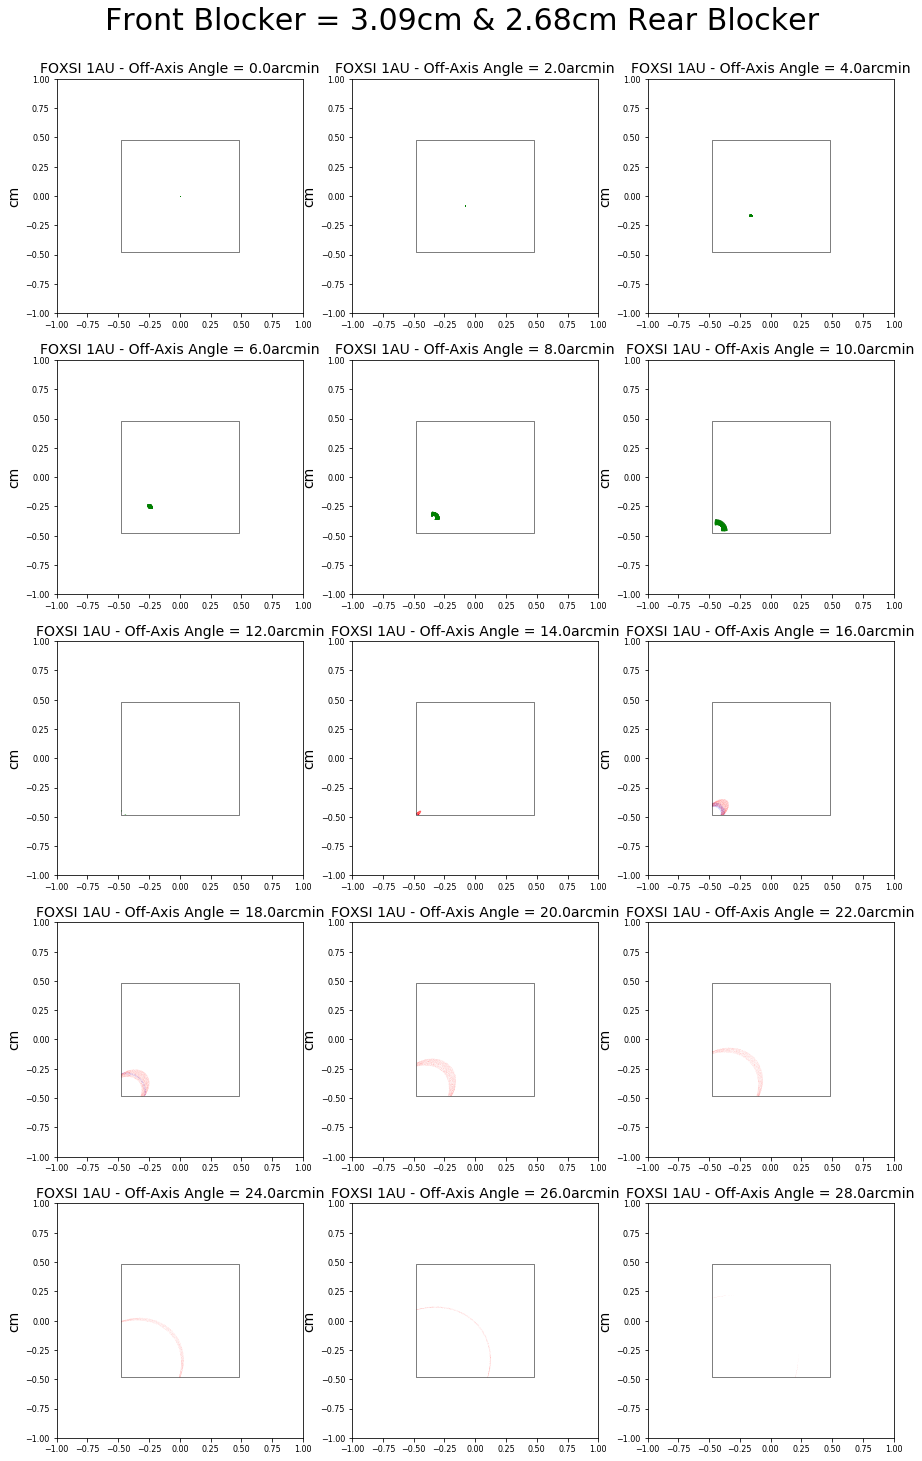

In [162]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.09cm & 2.68cm Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F309_R268_All_Hx[i],F309_R268_All_Hy[i],color='red',s=0.00001,alpha=0.8)
    plt.scatter(F309_R268_All_Px[i],F309_R268_All_Py[i],color='blue',s=0.00001,alpha=0.8)
    plt.scatter(F309_R268_All_Dx[i],F309_R268_All_Dy[i],color='green',s=0.00001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
plt.show()

In [163]:
Rout = 3.29
fbr = 3.17
F309_R268_Doubles, F309_R268_Hyp, F309_R268_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_R268_Doubles.append(len(F309_R268_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_R268_Hyp.append(len(F309_R268_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_R268_Par.append(len(F309_R268_All_Prays[i]) * (Rout**2 - fbr**2))

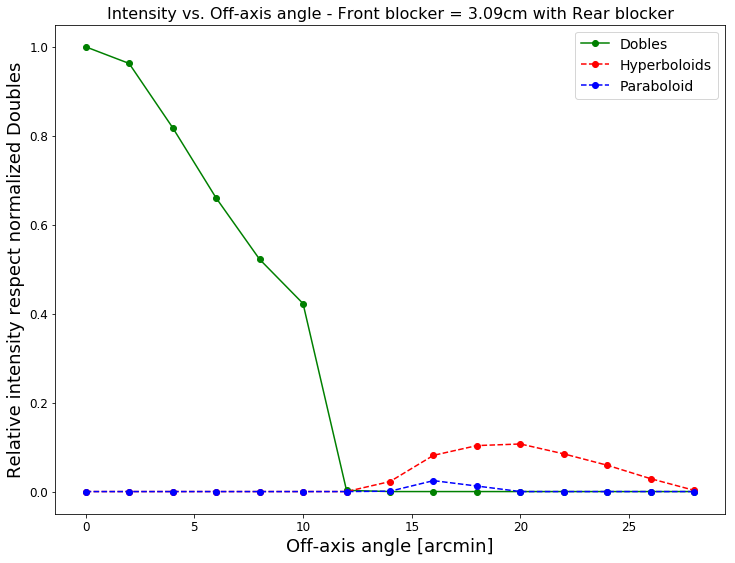

In [164]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.09cm with Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F309_R268_Doubles/max(np.array(F309_R268_Doubles)),'go-',label='Dobles')
plt.plot(offaxisAngles, F309_R268_Hyp/max(np.array(F309_R268_Doubles)),'ro--',label='Hyperboloids')
plt.plot(offaxisAngles, F309_R268_Par/max(np.array(F309_R268_Doubles)),'bo--',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.legend(fontsize=14)
plt.show()

## FB = 3.1334cm - RB = 2.68cm

In [154]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.1334
rbr = 2.68
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F313_R268_All_Drays, F313_R268_All_Hrays, F313_R268_All_Prays = [], [], []
F313_R268_All_Dx, F313_R268_All_Dy, F313_R268_All_Hx, F313_R268_All_Hy, F313_R268_All_Px, F313_R268_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R268/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F313_R268_All_Drays.append(Drays)
    F313_R268_All_Hrays.append(Hrays)
    F313_R268_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F313_R268_All_Hx.append(Hx)
    F313_R268_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F313_R268_All_Px.append(Px)
    F313_R268_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F313_R268_All_Dx.append(Dx)
    F313_R268_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R268/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R268/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R268/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R268/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R268/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R268/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R268/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R268/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

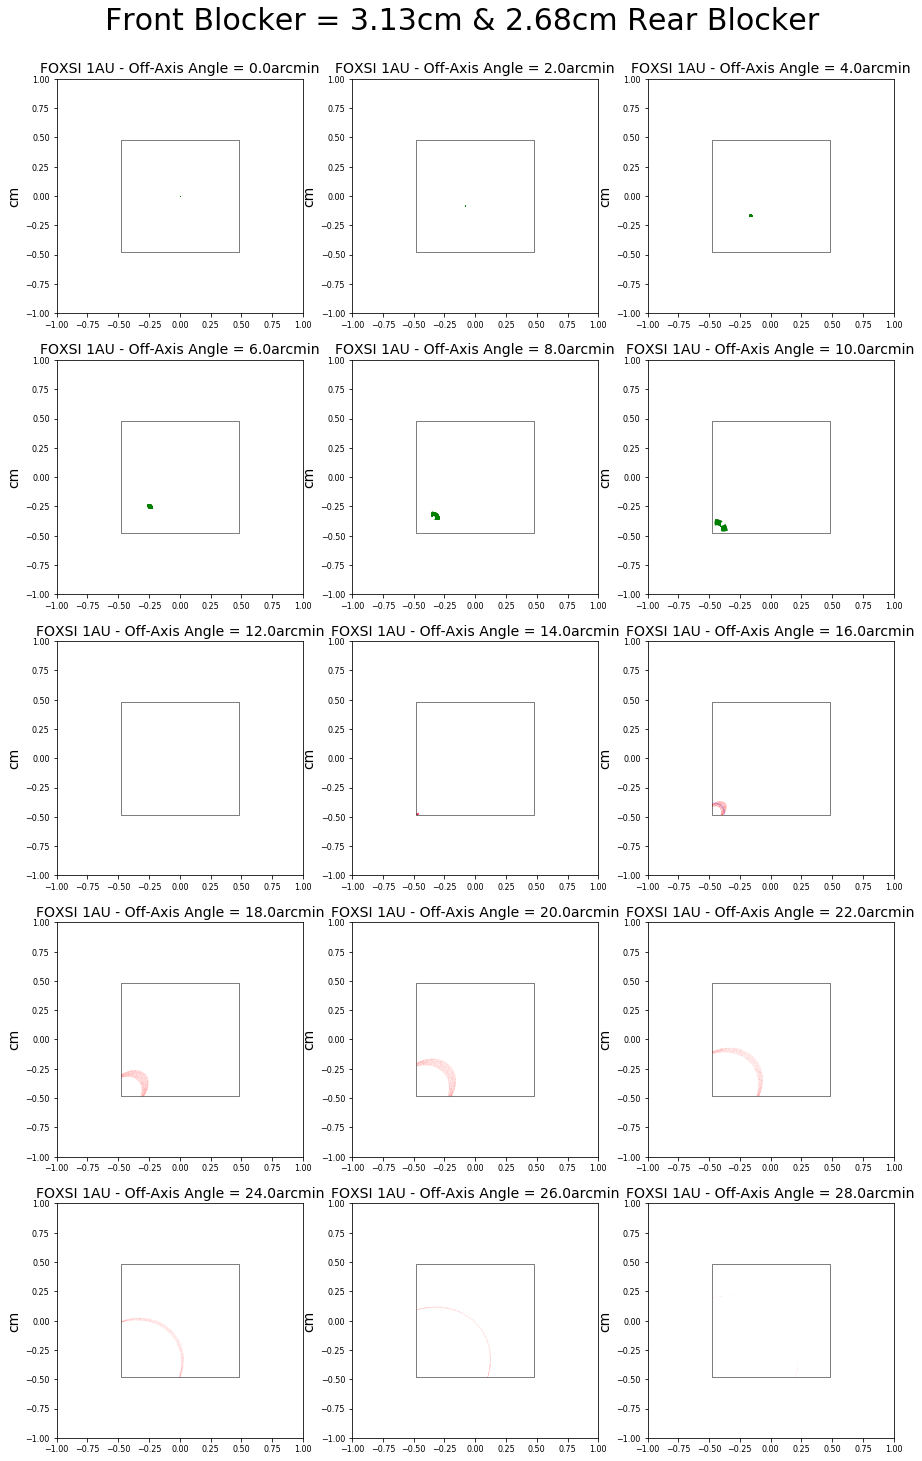

In [155]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.13cm & 2.68cm Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F313_R268_All_Hx[i],F313_R268_All_Hy[i],color='red',s=0.00001,alpha=0.8)
    plt.scatter(F313_R268_All_Px[i],F313_R268_All_Py[i],color='blue',s=0.00001,alpha=0.8)
    plt.scatter(F313_R268_All_Dx[i],F313_R268_All_Dy[i],color='green',s=0.00001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
plt.show()

In [156]:
Rout = 3.29
fbr = 3.17
F313_R268_Doubles, F313_R268_Hyp, F313_R268_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F313_R268_Doubles.append(len(F313_R268_All_Drays[i]) * (Rout**2 - fbr**2))
    F313_R268_Hyp.append(len(F313_R268_All_Hrays[i]) * (Rout**2 - fbr**2))
    F313_R268_Par.append(len(F313_R268_All_Prays[i]) * (Rout**2 - fbr**2))

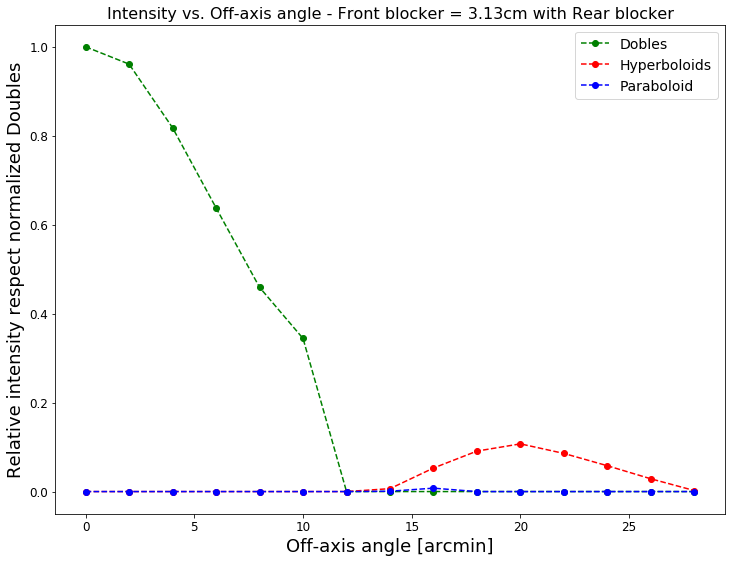

In [157]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.13cm with Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F313_R268_Doubles/max(np.array(F313_R268_Doubles)),'go--',label='Dobles')
plt.plot(offaxisAngles, F313_R268_Hyp/max(np.array(F313_R268_Doubles)),'ro--',label='Hyperboloids')
plt.plot(offaxisAngles, F313_R268_Par/max(np.array(F313_R268_Doubles)),'bo--',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.legend(fontsize=14)
plt.show()

## FB = 3.1700cm - RB = 2.8cm

In [134]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.17
rbr = 2.68
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F317_R268_All_Drays, F317_R268_All_Hrays, F317_R268_All_Prays = [], [], []
F317_R268_All_Dx, F317_R268_All_Dy, F317_R268_All_Hx, F317_R268_All_Hy, F317_R268_All_Px, F317_R268_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F317_R268_All_Drays.append(Drays)
    F317_R268_All_Hrays.append(Hrays)
    F317_R268_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F317_R268_All_Hx.append(Hx)
    F317_R268_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F317_R268_All_Px.append(Px)
    F317_R268_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F317_R268_All_Dx.append(Dx)
    F317_R268_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

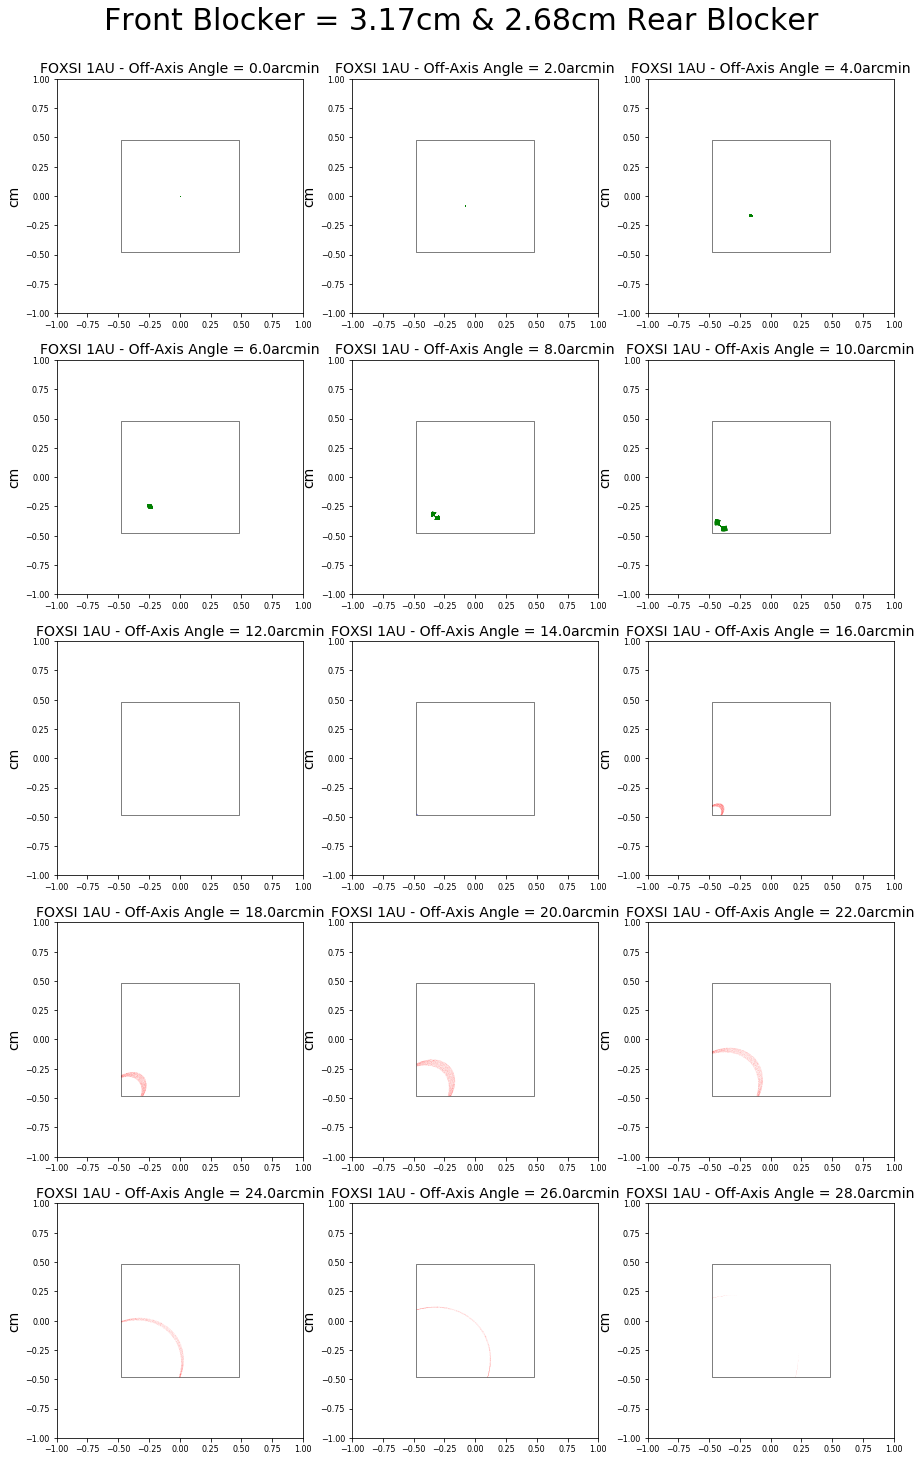

In [135]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.17cm & 2.68cm Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F317_R268_All_Hx[i],F317_R268_All_Hy[i],color='red',s=0.00001,alpha=0.8)
    plt.scatter(F317_R268_All_Px[i],F317_R268_All_Py[i],color='blue',s=0.00001,alpha=0.8)
    plt.scatter(F317_R268_All_Dx[i],F317_R268_All_Dy[i],color='green',s=0.00001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
plt.show()

In [137]:
Rout = 3.29
fbr = 3.17
F317_R268_Doubles, F317_R268_Hyp, F317_R268_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F317_R268_Doubles.append(len(F317_R268_All_Drays[i]) * (Rout**2 - fbr**2))
    F317_R268_Hyp.append(len(F317_R268_All_Hrays[i]) * (Rout**2 - fbr**2))
    F317_R268_Par.append(len(F317_R268_All_Prays[i]) * (Rout**2 - fbr**2))

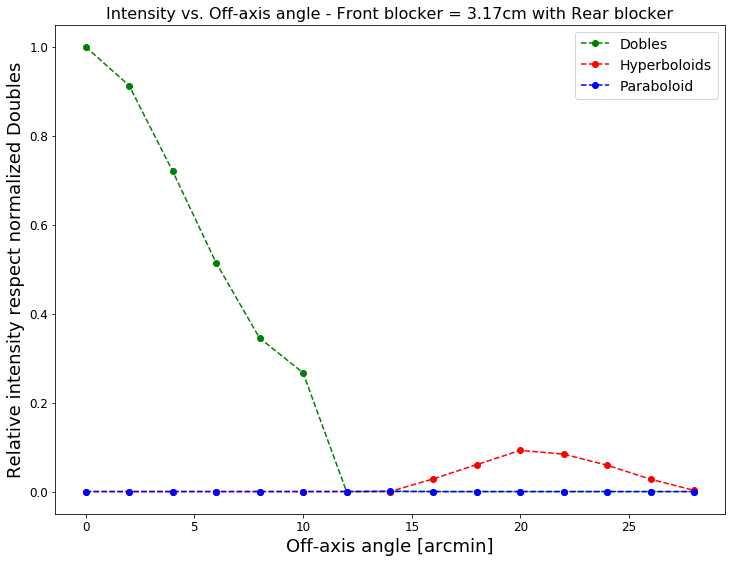

In [139]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm with Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F317_R268_Doubles/max(np.array(F317_R268_Doubles)),'go--',label='Dobles')
plt.plot(offaxisAngles, F317_R268_Hyp/max(np.array(F317_R268_Doubles)),'ro--',label='Hyperboloids')
plt.plot(offaxisAngles, F317_R268_Par/max(np.array(F317_R268_Doubles)),'bo--',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.legend(fontsize=14)
plt.show()

## All Together:

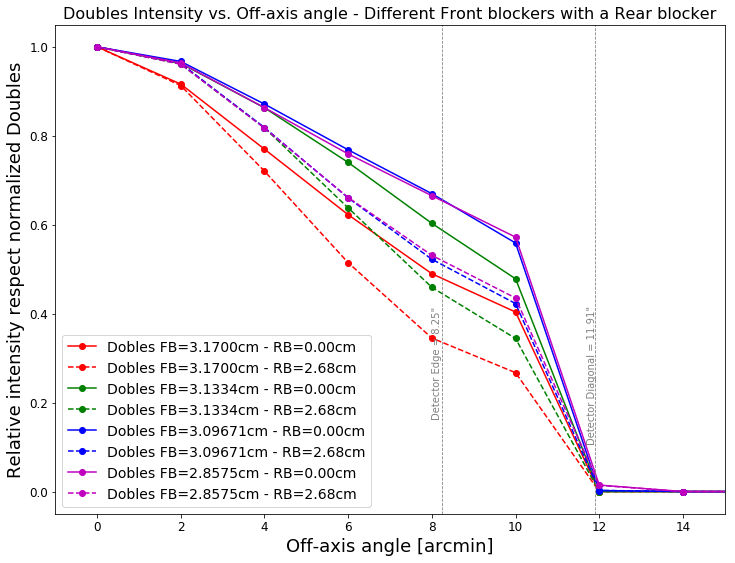

In [175]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Doubles Intensity vs. Off-axis angle - Different Front blockers with a Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F317_NR_Doubles/max(np.array(F317_NR_Doubles)),'ro-',label='Dobles FB=3.1700cm - RB=0.00cm')
plt.plot(offaxisAngles, F317_R268_Doubles/max(np.array(F317_R268_Doubles)),'ro--',label='Dobles FB=3.1700cm - RB=2.68cm')
plt.plot(offaxisAngles, F313_NR_Doubles/max(np.array(F313_NR_Doubles)),'go-',label='Dobles FB=3.1334cm - RB=0.00cm')
plt.plot(offaxisAngles, F313_R268_Doubles/max(np.array(F313_R268_Doubles)),'go--',label='Dobles FB=3.1334cm - RB=2.68cm')
plt.plot(offaxisAngles, F309_NR_Doubles/max(np.array(F309_NR_Doubles)),'bo-',label='Dobles FB=3.09671cm - RB=0.00cm')
plt.plot(offaxisAngles, F309_R268_Doubles/max(np.array(F309_R268_Doubles)),'bo--',label='Dobles FB=3.09671cm - RB=2.68cm')
plt.plot(offaxisAngles, F286_NR_Doubles/max(np.array(F286_NR_Doubles)),'mo-',label='Dobles FB=2.8575cm - RB=0.00cm')
plt.plot(offaxisAngles, F286_R268_Doubles/max(np.array(F286_R268_Doubles)),'mo--',label='Dobles FB=2.8575cm - RB=2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.xlim((-1,15))
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(8.0,0.4,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.7,0.4,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

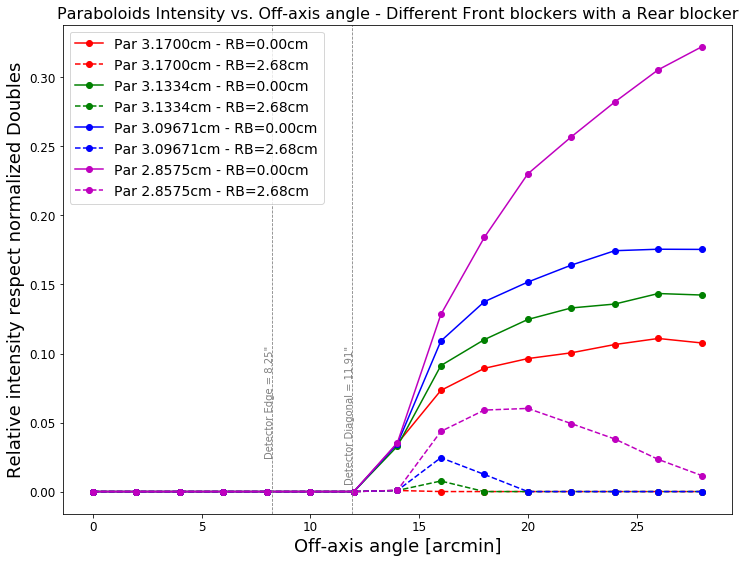

In [173]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Paraboloids Intensity vs. Off-axis angle - Different Front blockers with a Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F317_NR_Par/max(np.array(F317_NR_Doubles)),'ro-',label='Par 3.1700cm - RB=0.00cm')
plt.plot(offaxisAngles, F317_R268_Par/max(np.array(F317_R268_Doubles)),'ro--',label='Par 3.1700cm - RB=2.68cm')
plt.plot(offaxisAngles, F313_NR_Par/max(np.array(F313_NR_Doubles)),'go-',label='Par 3.1334cm - RB=0.00cm')
plt.plot(offaxisAngles, F313_R268_Par/max(np.array(F313_R268_Doubles)),'go--',label='Par 3.1334cm - RB=2.68cm')
plt.plot(offaxisAngles, F309_NR_Par/max(np.array(F309_NR_Doubles)),'bo-',label='Par 3.09671cm - RB=0.00cm')
plt.plot(offaxisAngles, F309_R268_Par/max(np.array(F309_R268_Doubles)),'bo--',label='Par 3.09671cm - RB=2.68cm')
plt.plot(offaxisAngles, F286_NR_Par/max(np.array(F286_NR_Doubles)),'mo-',label='Par 2.8575cm - RB=0.00cm')
plt.plot(offaxisAngles, F286_R268_Par/max(np.array(F286_R268_Doubles)),'mo--',label='Par 2.8575cm - RB=2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.1,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.1,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

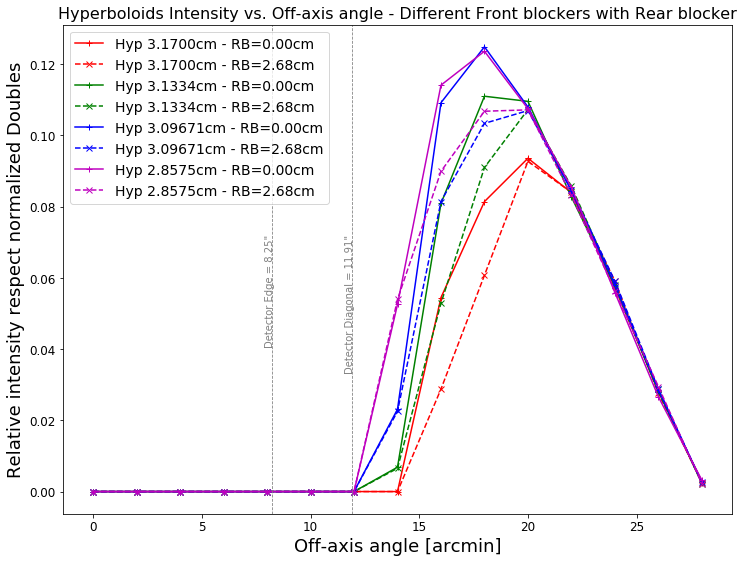

In [178]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Hyperboloids Intensity vs. Off-axis angle - Different Front blockers with Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F317_NR_Hyp/max(np.array(F317_NR_Doubles)),'r+-',label='Hyp 3.1700cm - RB=0.00cm')
plt.plot(offaxisAngles, F317_R268_Hyp/max(np.array(F317_R268_Doubles)),'rx--',label='Hyp 3.1700cm - RB=2.68cm')
plt.plot(offaxisAngles, F313_NR_Hyp/max(np.array(F313_NR_Doubles)),'g+-',label='Hyp 3.1334cm - RB=0.00cm')
plt.plot(offaxisAngles, F313_R268_Hyp/max(np.array(F313_R268_Doubles)),'gx--',label='Hyp 3.1334cm - RB=2.68cm')
plt.plot(offaxisAngles, F309_NR_Hyp/max(np.array(F309_NR_Doubles)),'b+-',label='Hyp 3.09671cm - RB=0.00cm')
plt.plot(offaxisAngles, F309_R268_Hyp/max(np.array(F309_R268_Doubles)),'bx--',label='Hyp 3.09671cm - RB=2.68cm')
plt.plot(offaxisAngles, F286_NR_Hyp/max(np.array(F286_NR_Doubles)),'m+-',label='Hyp 2.8575cm - RB=0.00cm')
plt.plot(offaxisAngles, F286_R268_Hyp/max(np.array(F286_R268_Doubles)),'mx--',label='Hyp 2.8575cm - RB=2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.07,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.07,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

# For this analysis with off-axis sources the most efficient size for the Front blocker is 3.09671cm.

## However, a rear blocker of r = 2.68cm has a strong vignetting effect on the doubly reflected rays. Next task is to detemine the most efficient size of the rear blocker for a front blocker of 3.09671cm.

### See Next Notebook called: ""